<div style="text-align: center;margin-left: -5%;  font-size: 35px;">
    <b>PRCP-1013-WALK RUN CLASS</b>
</div>

<div style="text-align: center;margin-left: -5%;  font-size: 30px;">
    <b>TASK 1 : Data Analysis Report</b>
</div>

### Importing Libraries

In [4]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, MinMaxScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense, Dropout
from tensorflow.keras.utils import to_categorical

data = pd.read_csv('walkrun.csv')
data.head()
data1=pd.read_csv('walkrun.csv')

In [5]:
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

### Finding Columns

In [6]:
print(f"Dataset Shape: {data.shape}")
print(f"Dataset Columns: {data.columns}")

Dataset Shape: (88588, 11)
Dataset Columns: Index(['date', 'time', 'username', 'wrist', 'activity', 'acceleration_x',
       'acceleration_y', 'acceleration_z', 'gyro_x', 'gyro_y', 'gyro_z'],
      dtype='object')


In [7]:
print("First 5 Rows:")
print(data.head())

First 5 Rows:
        date                time username  wrist  activity  acceleration_x  \
0  2017-6-30  13:51:15:847724020   viktor      0         0          0.2650   
1  2017-6-30  13:51:16:246945023   viktor      0         0          0.6722   
2  2017-6-30  13:51:16:446233987   viktor      0         0          0.4399   
3  2017-6-30  13:51:16:646117985   viktor      0         0          0.3031   
4  2017-6-30  13:51:16:846738994   viktor      0         0          0.4814   

   acceleration_y  acceleration_z  gyro_x  gyro_y  gyro_z  
0         -0.7814         -0.0076 -0.0590  0.0325 -2.9296  
1         -1.1233         -0.2344 -0.1757  0.0208  0.1269  
2         -1.4817          0.0722 -0.9105  0.1063 -2.4367  
3         -0.8125          0.0888  0.1199 -0.4099 -2.9336  
4         -0.9312          0.0359  0.0527  0.4379  2.4922  


In [8]:
print("\nDataset Information:")
print(data.info())


Dataset Information:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 88588 entries, 0 to 88587
Data columns (total 11 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   date            88588 non-null  object 
 1   time            88588 non-null  object 
 2   username        88588 non-null  object 
 3   wrist           88588 non-null  int64  
 4   activity        88588 non-null  int64  
 5   acceleration_x  88588 non-null  float64
 6   acceleration_y  88588 non-null  float64
 7   acceleration_z  88588 non-null  float64
 8   gyro_x          88588 non-null  float64
 9   gyro_y          88588 non-null  float64
 10  gyro_z          88588 non-null  float64
dtypes: float64(6), int64(2), object(3)
memory usage: 7.4+ MB
None


In [9]:
print("\nClass Distribution:")
print(data['activity'].value_counts()) 
print("1 -> RUN\n0 -> WALK")



Class Distribution:
activity
1    44365
0    44223
Name: count, dtype: int64
1 -> RUN
0 -> WALK


In [10]:
print("\nStatistical Summary:")
print(data.describe())


Statistical Summary:
              wrist      activity  acceleration_x  acceleration_y  \
count  88588.000000  88588.000000    88588.000000    88588.000000   
mean       0.522170      0.500801       -0.074811       -0.562585   
std        0.499511      0.500002        1.009299        0.658458   
min        0.000000      0.000000       -5.350500       -3.299000   
25%        0.000000      0.000000       -0.381800       -1.033500   
50%        1.000000      1.000000       -0.059500       -0.759100   
75%        1.000000      1.000000        0.355500       -0.241775   
max        1.000000      1.000000        5.603300        2.668000   

       acceleration_z        gyro_x        gyro_y        gyro_z  
count    88588.000000  88588.000000  88588.000000  88588.000000  
mean        -0.313956      0.004160      0.037203      0.022327  
std          0.486815      1.253423      1.198725      1.914423  
min         -3.753800     -4.430600     -7.464700     -9.480000  
25%         -0.376000     

### Visualizations of the Data

C:\Users\ASUS\AppData\Local\Temp\ipykernel_17924\2431884929.py:15: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend(title=class_column, loc='upper right')


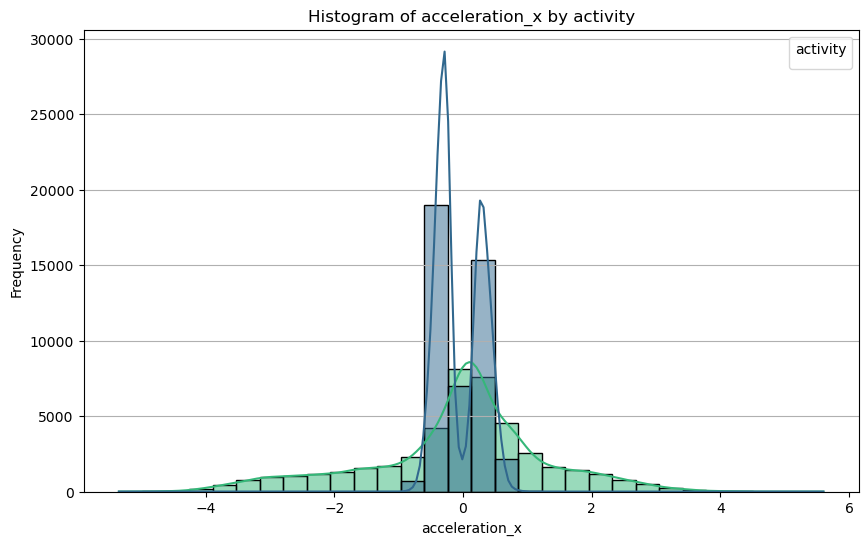

C:\Users\ASUS\AppData\Local\Temp\ipykernel_17924\2431884929.py:15: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend(title=class_column, loc='upper right')


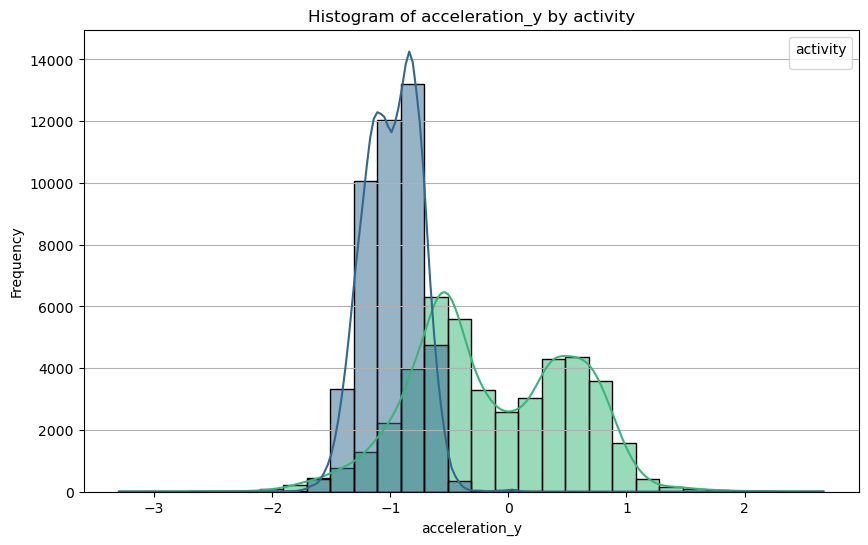

C:\Users\ASUS\AppData\Local\Temp\ipykernel_17924\2431884929.py:15: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend(title=class_column, loc='upper right')


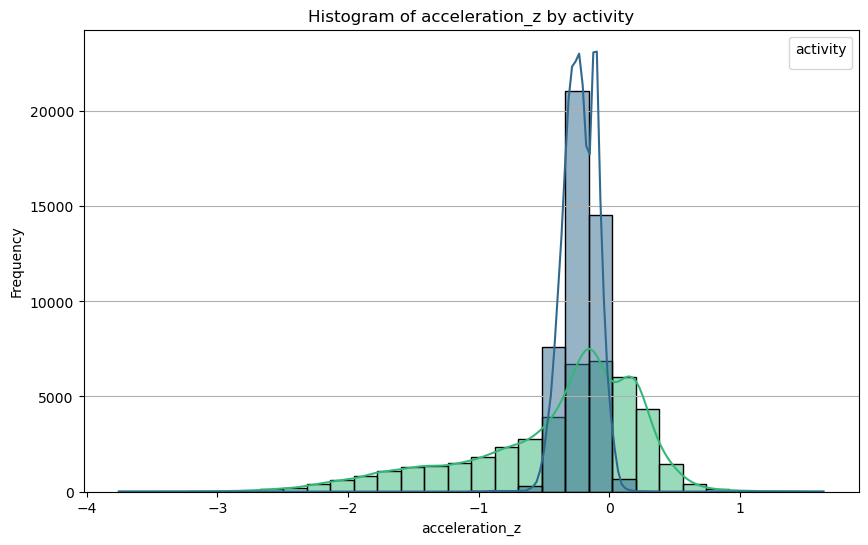

C:\Users\ASUS\AppData\Local\Temp\ipykernel_17924\2431884929.py:15: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend(title=class_column, loc='upper right')


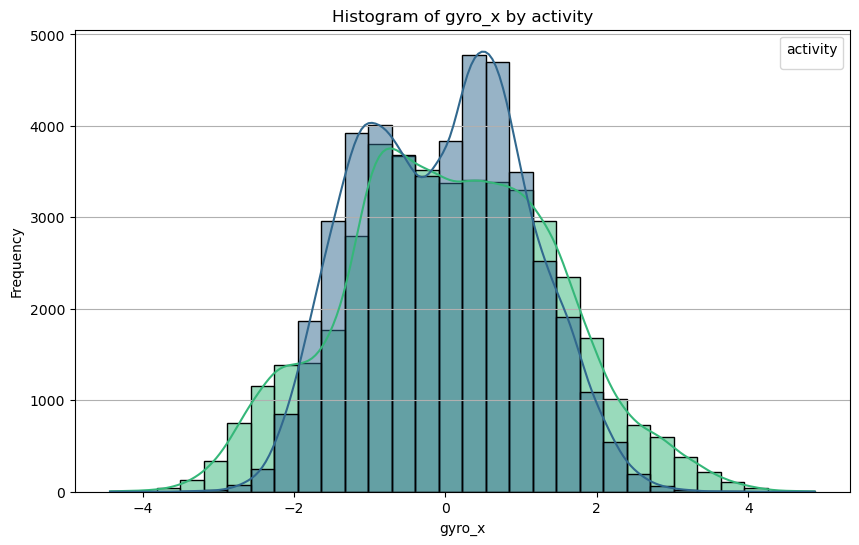

C:\Users\ASUS\AppData\Local\Temp\ipykernel_17924\2431884929.py:15: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend(title=class_column, loc='upper right')


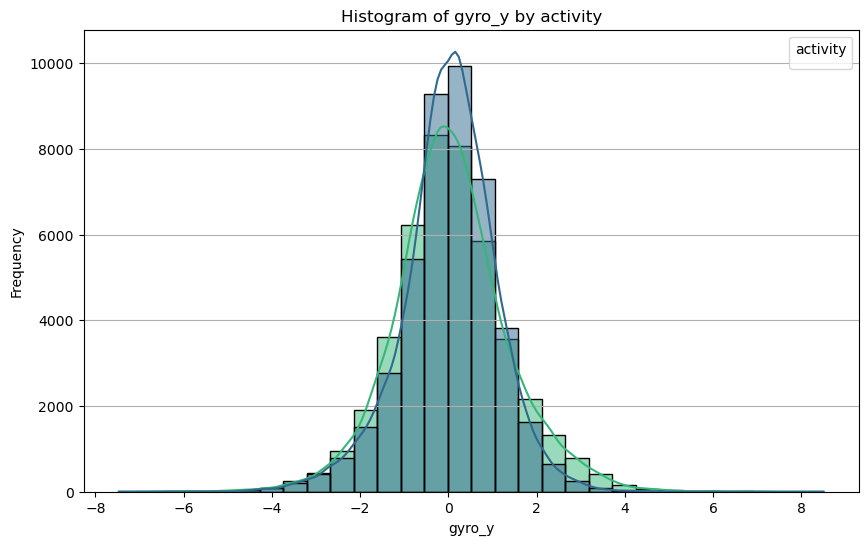

C:\Users\ASUS\AppData\Local\Temp\ipykernel_17924\2431884929.py:15: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend(title=class_column, loc='upper right')


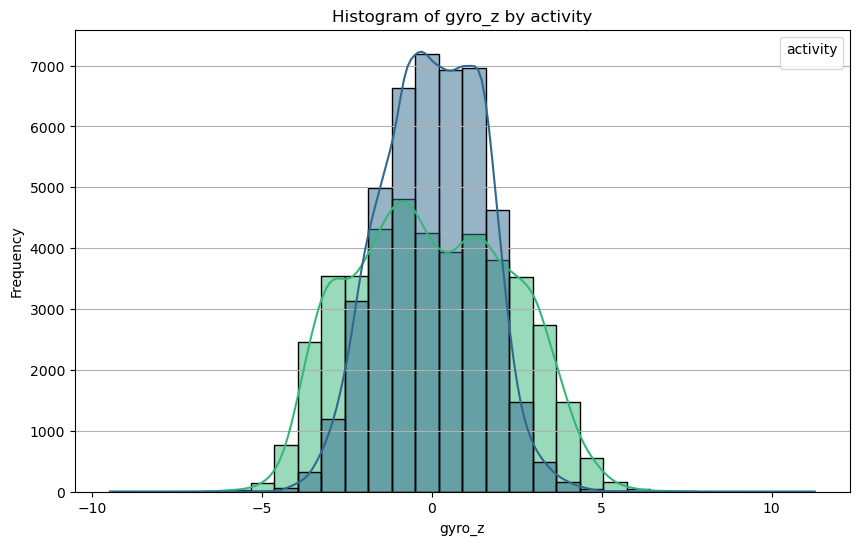

In [11]:
import matplotlib.pyplot as plt
import seaborn as sns

acceleration_features = ['acceleration_x', 'acceleration_y', 'acceleration_z']
gyroscope_features = ['gyro_x', 'gyro_y', 'gyro_z']
class_column = 'activity'

def plot_histograms(data, features, class_column):
    for feature in features:
        plt.figure(figsize=(10, 6))
        sns.histplot(data=data, x=feature, hue=class_column, kde=True, bins=30, palette="viridis")
        plt.title(f"Histogram of {feature} by {class_column}")
        plt.xlabel(feature)
        plt.ylabel("Frequency")
        plt.legend(title=class_column, loc='upper right')
        plt.grid(axis='y')
        plt.show()
plot_histograms(data, acceleration_features + gyroscope_features, class_column)





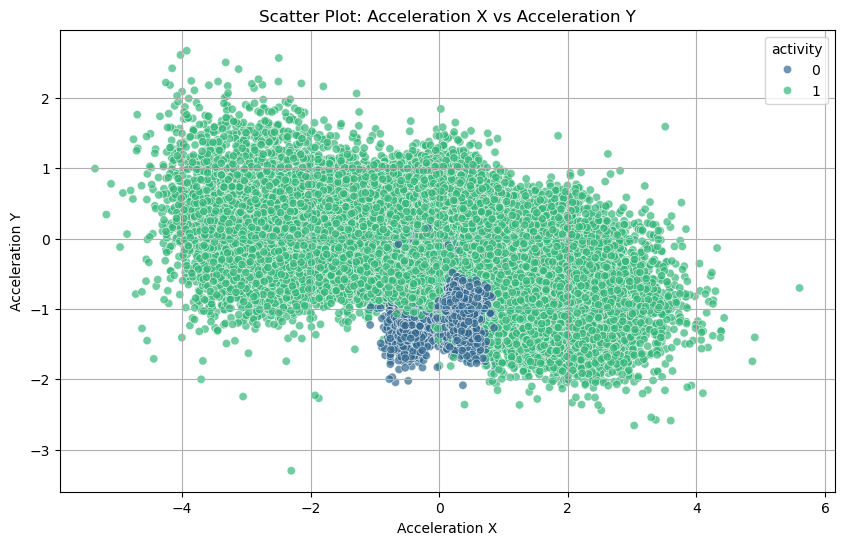

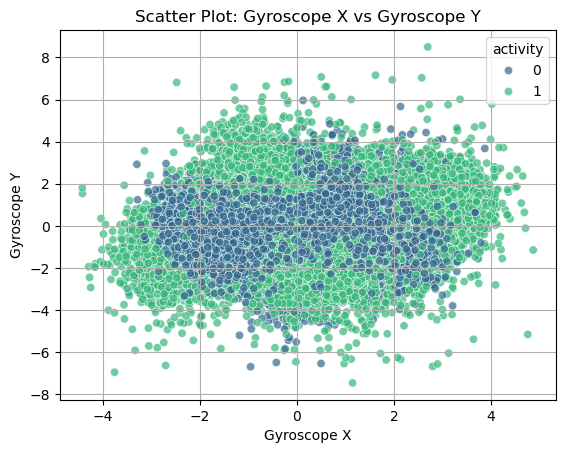

In [13]:
plt.figure(figsize=(10, 6))
sns.scatterplot(
    data=data, x='acceleration_x', y='acceleration_y', hue=class_column,
    palette="viridis", alpha=0.7
)
plt.title("Scatter Plot: Acceleration X vs Acceleration Y")
plt.xlabel("Acceleration X")
plt.ylabel("Acceleration Y")
plt.legend(title=class_column)
plt.grid()
plt.show()
sns.scatterplot(
    data=data, x='gyro_x', y='gyro_y', hue=class_column,
    palette="viridis", alpha=0.7
)
plt.title("Scatter Plot: Gyroscope X vs Gyroscope Y")
plt.xlabel("Gyroscope X")
plt.ylabel("Gyroscope Y")
plt.legend(title=class_column)
plt.grid()
plt.show()

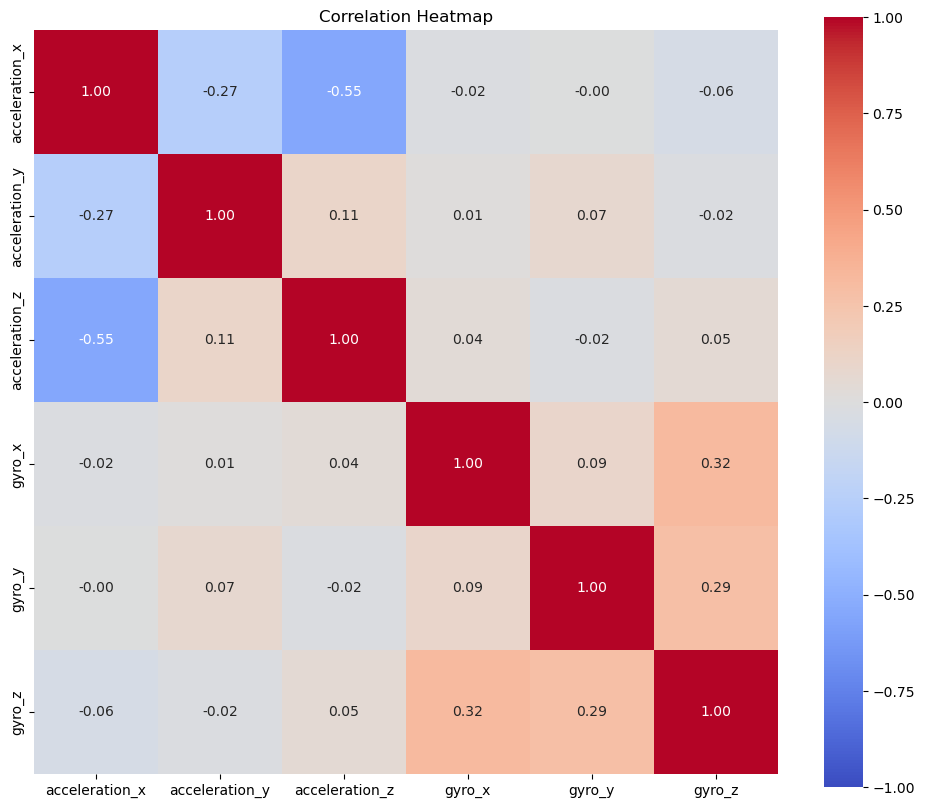

In [14]:
plt.figure(figsize=(12, 10))
numeric_features = acceleration_features + gyroscope_features 
correlation_matrix = data[numeric_features].corr()
sns.heatmap(correlation_matrix, annot=True, fmt=".2f", cmap="coolwarm", vmin=-1, vmax=1, square=True)
plt.title("Correlation Heatmap")
plt.show()


### Finding NULL Values

In [15]:
data.isnull().sum()

date              0
time              0
username          0
wrist             0
activity          0
acceleration_x    0
acceleration_y    0
acceleration_z    0
gyro_x            0
gyro_y            0
gyro_z            0
dtype: int64

### Data Preprocessing 

In [16]:
label_encoder = LabelEncoder()
data['activity'] = label_encoder.fit_transform(data['activity'])

In [19]:
scaler = MinMaxScaler()
sensor_columns = ['acceleration_x', 'acceleration_y', 'acceleration_z', 
                  'gyro_x', 'gyro_y', 'gyro_z']
data[sensor_columns] = scaler.fit_transform(data[sensor_columns])

### Creating Sequences

In [23]:
def create_sequences(data, sensor_columns, label_column, sequence_length=50):
    X, y = [], []
    for i in range(len(data) - sequence_length):
        seq_x = data[sensor_columns].iloc[i:i+sequence_length].values
        seq_y = data[label_column].iloc[i+sequence_length]
        X.append(seq_x)
        y.append(seq_y)
    return np.array(X), np.array(y)

sequence_length = 50
X, y = create_sequences(data, sensor_columns, 'activity', sequence_length)
y = to_categorical(y)

<div style="text-align: center;margin-left: -5%;  font-size: 30px;">
    <b>TASK 2 : Model Buliding</b>
</div>

### 1) Using LSTM
### 2) Using Random Forest Regressor

### **Model Building using ***LSTM*****

In [24]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [25]:
model = Sequential([
    LSTM(128, input_shape=(sequence_length, len(sensor_columns)), return_sequences=True),
    Dropout(0.2),
    LSTM(64, return_sequences=False),
    Dropout(0.2),
    Dense(64, activation='relu'),
    Dense(y.shape[1], activation='softmax') 
])

C:\Users\ASUS\anaconda3\Lib\site-packages\keras\src\layers\rnn\rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


In [26]:
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

In [27]:
history = model.fit(X_train, y_train, validation_data=(X_test, y_test), epochs=15, batch_size=128)


Epoch 1/15
554/554 ━━━━━━━━━━━━━━━━━━━━ 153s 264ms/step - accuracy: 0.8917 - loss: 0.2365 - val_accuracy: 0.9962 - val_loss: 0.0209
Epoch 2/15
554/554 ━━━━━━━━━━━━━━━━━━━━ 405s 732ms/step - accuracy: 0.9958 - loss: 0.0233 - val_accuracy: 0.9971 - val_loss: 0.4385
Epoch 3/15
554/554 ━━━━━━━━━━━━━━━━━━━━ 211s 273ms/step - accuracy: 0.8043 - loss: 0.4486 - val_accuracy: 0.9963 - val_loss: 0.0188
Epoch 4/15
554/554 ━━━━━━━━━━━━━━━━━━━━ 147s 266ms/step - accuracy: 0.9961 - loss: 0.0192 - val_accuracy: 0.9970 - val_loss: 0.0137
Epoch 5/15
554/554 ━━━━━━━━━━━━━━━━━━━━ 202s 266ms/step - accuracy: 0.9969 - loss: 0.0165 - val_accuracy: 0.9972 - val_loss: 0.0128
Epoch 6/15
554/554 ━━━━━━━━━━━━━━━━━━━━ 260s 371ms/step - accuracy: 0.9972 - loss: 0.0130 - val_accuracy: 0.9975 - val_loss: 0.0130
Epoch 7/15
554/554 ━━━━━━━━━━━━━━━━━━━━ 118s 194ms/step - accuracy: 0.9973 - loss: 0.0132 - val_accuracy: 0.9973 - val_loss: 0.0118
Epoch 8/15
554/554 ━━━━━━━━━━━━━━━━━━━━ 100s 181ms/step - accuracy: 0.9977 -

In [28]:

test_loss, test_accuracy = model.evaluate(X_test, y_test)
print(f"Test Accuracy: {test_accuracy:.2f}")


554/554 ━━━━━━━━━━━━━━━━━━━━ 11s 20ms/step - accuracy: 0.9984 - loss: 0.0077
Test Accuracy: 1.00


In [29]:
test_loss, test_accuracy = model.evaluate(X_train, y_train)
print(f"Train Accuracy: {test_accuracy:.2f}")

2214/2214 ━━━━━━━━━━━━━━━━━━━━ 60s 27ms/step - accuracy: 0.9981 - loss: 0.0094
Train Accuracy: 1.00


## **Accuracy : 100%**

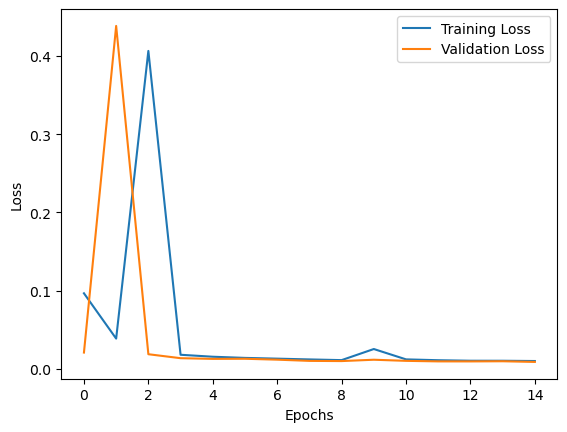

In [30]:
import matplotlib.pyplot as plt

plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()


554/554 ━━━━━━━━━━━━━━━━━━━━ 8s 13ms/step


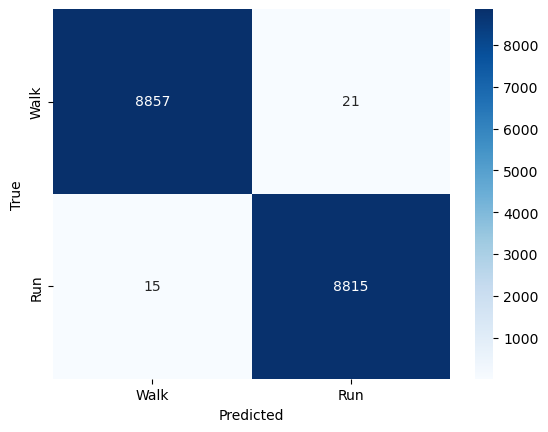

In [31]:
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

y_pred = model.predict(X_test)
y_pred_class = np.argmax(y_pred, axis=1)
cm = confusion_matrix(np.argmax(y_test, axis=1), y_pred_class)

sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", xticklabels=["Walk", "Run"], yticklabels=["Walk", "Run"])
plt.xlabel('Predicted')
plt.ylabel('True')
plt.show()


### Save the model

In [ ]:

model.save('walk_run_lstm_model.h5')


In [32]:
import numpy as np
import pandas as pd

data = pd.read_csv("walkrun.csv")
sensor_values = data[['acceleration_x', 'acceleration_y', 'acceleration_z', 'gyro_x', 'gyro_y', 'gyro_z']].iloc[7576].values
sequence_length = 1  
num_features = 6    
input_data = sensor_values.reshape((1, sequence_length, num_features))
print(f"Input data shape: {input_data.shape}") 
prediction = model.predict(input_data)

print("prediction =",prediction )
print("========================================")
predicted_activity = "Walk" if prediction[0][0] > 0.5 else "Run"

print("predicted Activity =",predicted_activity)
print("========================================")
true_label = data['activity'].iloc[7576]

print("true_label =",true_label)
print("========================================")
true_activity = "Walk" if true_label == 0 else "Run"

print("true_activity =",true_activity)
print("========================================")
print(f"True Activity: {true_activity}")
print(f"Predicted Activity: {predicted_activity}")

if predicted_activity == true_activity:
    print("Prediction is correct!")
else:
    print("Prediction is incorrect!")


Input data shape: (1, 1, 6)
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 298ms/step
prediction = [[0.9846031 0.0153969]]
predicted Activity = Walk
true_label = 0
true_activity = Walk
True Activity: Walk
Predicted Activity: Walk
Prediction is correct!


### **Model Building using ***Random Forest Classifier*****

In [33]:
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()
data1['activity'] = le.fit_transform(data1['activity'])  # 0: walking, 1: running


In [34]:
from sklearn.model_selection import train_test_split

X = data1[['acceleration_x', 'acceleration_y', 'acceleration_z', 'gyro_x', 'gyro_y', 'gyro_z']]
y = data1['activity']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [35]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)


In [36]:
from sklearn.ensemble import RandomForestClassifier

model = RandomForestClassifier(random_state=42)
model.fit(X_train, y_train)


RandomForestClassifier(random_state=42)

In [37]:
from sklearn.metrics import accuracy_score, classification_report

y_pred = model.predict(X_test)
print("Accuracy:", accuracy_score(y_test, y_pred))
print(classification_report(y_test, y_pred))


Accuracy: 0.9906874365052489
              precision    recall  f1-score   support

           0       0.99      0.99      0.99      8913
           1       0.99      0.99      0.99      8805

    accuracy                           0.99     17718
   macro avg       0.99      0.99      0.99     17718
weighted avg       0.99      0.99      0.99     17718



## **Accuracy : 99%**

In [38]:
from sklearn.model_selection import GridSearchCV

param_grid = {
    'n_estimators': [50, 100, 150],
    'max_depth': [None, 10, 20],
    'min_samples_split': [2, 5, 10]
}

grid_search = GridSearchCV(RandomForestClassifier(random_state=42), param_grid, cv=5)
grid_search.fit(X_train, y_train)
print("Best Parameters:", grid_search.best_params_)


Best Parameters: {'max_depth': None, 'min_samples_split': 2, 'n_estimators': 150}


In [39]:
input = {
    'acceleration_x':0.3031,				
    'acceleration_y': -0.8125,
    'acceleration_z': 0.0888,
    'gyro_x': 0.1199,
    'gyro_y': -0.4099,
    'gyro_z': -2.9336
}

import pandas as pd
input_df = pd.DataFrame([input])


In [40]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)
input_scaled = scaler.transform(input_df)


C:\Users\ASUS\anaconda3\Lib\site-packages\sklearn\base.py:486: UserWarning: X has feature names, but StandardScaler was fitted without feature names
  warnings.warn(


In [41]:
predicted_class = model.predict(input_scaled)
label_map = {0: 'walking', 1: 'running'}
predicted_activity = label_map[predicted_class[0]]

print(f"Predicted activity: {predicted_activity}")


Predicted activity: walking


In [42]:
test_inputs = [
    {'acceleration_x': 0.5, 'acceleration_y': -0.2, 'acceleration_z': 1.0, 'gyro_x': 0.05, 'gyro_y': -0.03, 'gyro_z': 0.1},
    {'acceleration_x': 0.9, 'acceleration_y': 0.0888, 'acceleration_z': 1.2, 'gyro_x': 0.08, 'gyro_y': -0.6775, 'gyro_z': 0.15}
]
test_df = pd.DataFrame(test_inputs)
test_scaled = scaler.transform(test_df)
predictions = model.predict(test_scaled)
predicted_activities = [label_map[p] for p in predictions]

for i, activity in enumerate(predicted_activities):
    print(f"Input {i + 1}: {activity}")


Input 1: running
Input 2: running


C:\Users\ASUS\anaconda3\Lib\site-packages\sklearn\base.py:486: UserWarning: X has feature names, but StandardScaler was fitted without feature names
  warnings.warn(


## **Conclusion**

#### This project Classify the Walking and Running .Based on the input features like acceleration_features ,

#### gyroscope_features etc. Model Building  achieved by **LSTM** and  **Random Forest Classifier**.

#### 1-> RUN

#### 0-> WALK

#### **Random Forest classifier** has accuracy of ***99%*** .this model Predict the output correctly.

#### **LSTM** - achieved ***100%*** accuracy. this model has highest performance comparing with Random Forest classifier

## **Challenges**

#### **Feature Correlation** – Acceleration and gyroscope data are interdependent, selecting the right features is critical for accurate classification. 

#### **Data Imbalance** –If one activity (walking or running) is more frequent in the dataset, the model may become biased toward the dominant  

#### class.

#### **Overfitting in Deep Learning Models** – Achieving 100% accuracy with LSTM may indicate overfitting; testing on unseen data is necessary.

#### **creating sequence takes more time.**

